# Experiment 3 - Online Functionality on the Phantom

In [1]:
import os

import cv2
import matplotlib.pyplot as plt
import pandas as pd

# 01. Plot Sample Images as Matrix

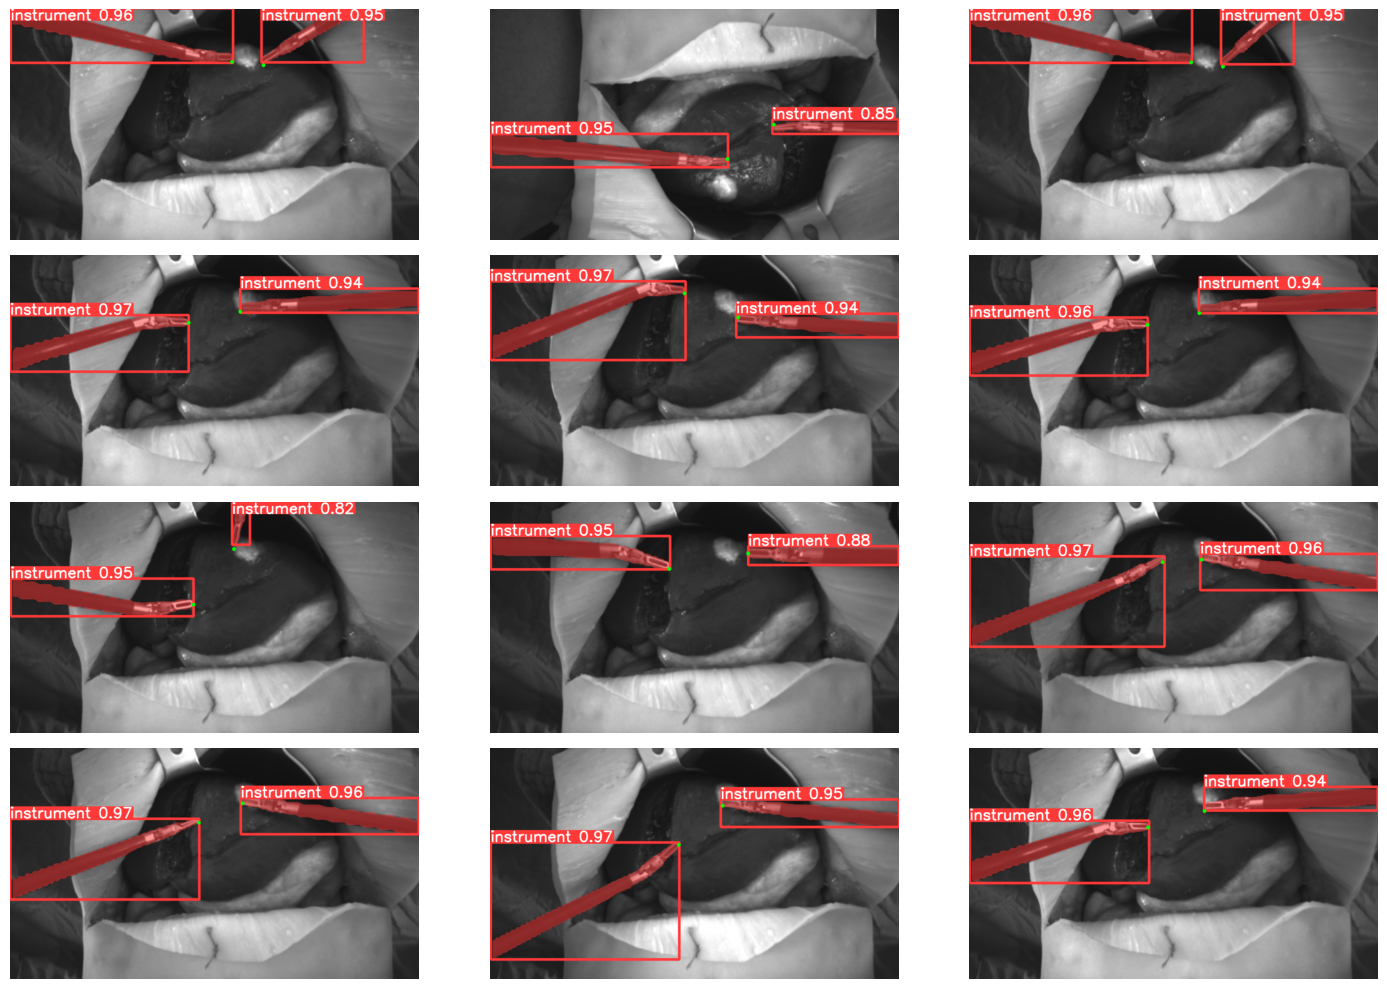

In [2]:
# Set the path to your images directory
ROOT = '..'

image_directory = os.path.join(ROOT, 'datasets/evaluation/online/on_surface/qualitative/label_images')

# Read the first 12 image filenames
image_filenames = [f for f in os.listdir(image_directory) if f.endswith(('.jpg', '.jpeg', '.png'))][:12]

# Load the images
images = [cv2.imread(os.path.join(image_directory, img)) for img in image_filenames]

# Convert images from BGR to RGB (required for displaying with matplotlib)
images_rgb = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in images]

# Display the images in a 3x4 matrix plot
fig, axes = plt.subplots(4, 3, figsize=(15, 10))

for i, ax in enumerate(axes.flat):
    if i < len(images_rgb):
        ax.imshow(images_rgb[i])
        #ax.set_title(image_filenames[i])
    ax.axis('off')

plt.tight_layout()

plt.show()

# 02. Exemplary Point cloud

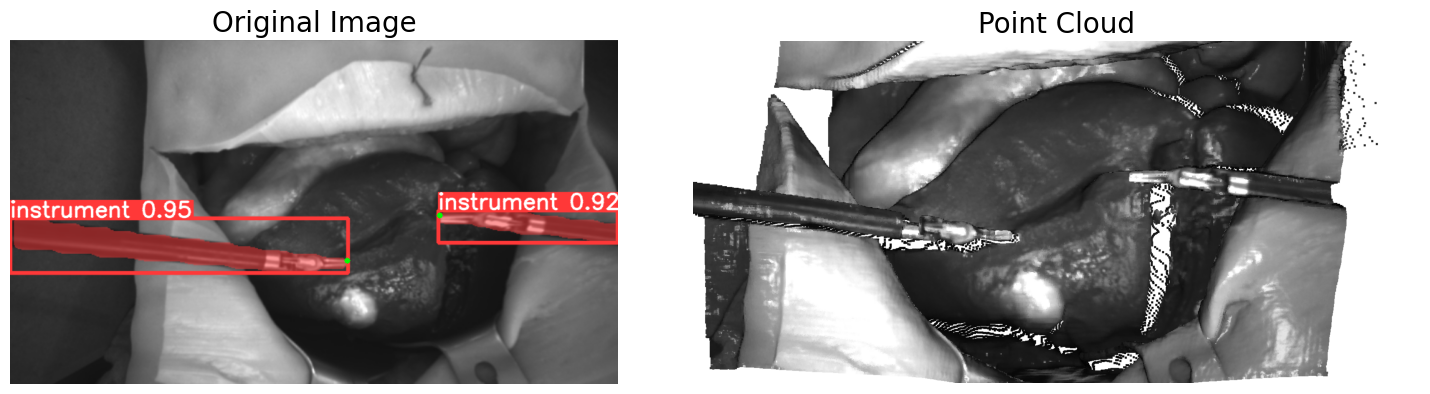

In [3]:
# Set the crop threshold manually
crop_threshold = 500

# Directory containing your images
ROOT = '..'
image_dir = os.path.join(ROOT, "datasets/evaluation/online/on_surface/qualitative/experiment_1682498004/plot1")

# Function to crop images using a threshold
def crop_image(image, threshold):
    h, w, _ = image.shape
    cropped_image = image[700:h-500, 700:w-800]
    return cropped_image

# Get a sorted list of image file names from the directory
image_files = sorted(os.listdir(image_dir))

# Filter out any non-image files
image_files = [file for file in image_files if file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif'))]

# Read the two images
img1 = cv2.imread(os.path.join(image_dir, image_files[0]))
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

img2 = cv2.imread(os.path.join(image_dir, image_files[1]))
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

# Crop the second image
img2 = crop_image(img2, crop_threshold)

# Create a figure and set its size
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

# Define the vertical space between the images
plt.subplots_adjust(hspace=0.4)

# Add the titles "Original Image" and "Point Cloud" at the top
titles = ["Original Image", "Point Cloud"]
for i, title in enumerate(titles):
    axes[i].set_title(title, fontsize=20)
    axes[i].title.set_position([.5, 1.5])

# Display the images
axes[0].imshow(img1)
axes[0].axis("off")

axes[1].imshow(img2)
axes[1].axis("off")

# Show the matrix plot
plt.tight_layout()
plt.show()